# 1) Project Overview

The project was part of the Women in Data residency program. It was focused on the opportunity and need for workforce transformation in the city of Rancho Cordova.

The data consists of two datasets:

* industry_RC.csv - containing offer ids and meta data about each offer (duration, type, etc.)
* ICT_growth.csv - demographic data for each customer

Here is the schema and explanation of each variable in the files:

**industry_RC.csv**
* Rancho_Cordova_ID (str) - industry ID
* Industry (str) - industry name
* Year (int) - year 
* Employment_Total (int) - number of employment total
* Employment_Male_Percentage (float) - percentage of male employment
* Employment_Male (float) - number of employment male
* Employment_Female_Percentage (float) - percentage of female emplyoment
* Employment_Female (float) - number of employment female
* Median_Earnings_Total (float) - number of median earnings total
* Median_Earnings_Male (float) - number of median earnings male
* Median_Earnings_Female (float) - number of median earnings female

**ICT_growth.csv**
* code (str) - industry code
* Industry (str) - industry name
* 1996 - 2017 - data columns by year
* ICT_Group - ICT Capital Services Group 

# 2) Data understanding

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import pylab 
%matplotlib inline

In [41]:
#reading data set
industry_RC = pd.read_csv(r'C:\Users\RomyF\Documents\Residency Program\Data\Analysis\industry_RC.csv')
ICT_growth = pd.read_csv(r'C:\Users\RomyF\Documents\Residency Program\Data\Analysis\ICT_growth.csv')

In [42]:
industry_RC.head(2)

,Rancho_Cordova_ID,Industry,Year,Employment_Total,Employment_Male_Percentage,Employment_Male,Employment_Female_Percentage,Employment_Female,Median_Earnings_Total,Median_Earnings_Male,Median_Earnings_Female,Women_earnings_percentage
0,S2403_C01_001E,Total,2010,28733,53.2,15286.0,46.8,13447.0,NaN,NaN,NaN,NaN
1,S2403_C01_002E,"Agriculture, forestry, fishing and hunting, an...",2010,124,83.9,104.0,16.1,20.0,NaN,NaN,NaN,NaN


In [43]:
industry_RC.shape

(190, 12)

In [44]:
industry_RC.Industry.value_counts()

Wholesale trade                                             10
Management of companies and enterprises                     10
Agriculture, forestry, fishing and hunting, and mining      10
Accommodation and food services                             10
Information                                                 10
Construction                                                10
Transportation and warehousing, and utilities               10
Educational services                                        10
Finance and insurance                                       10
Retail trade                                                10
Real estate and rental and leasing                          10
Administrative and support and waste management services    10
Health care and social assistance                           10
Other services, except public administration                10
Manufacturing                                               10
Arts, entertainment, and recreation                    

In [45]:
industry_RC.isnull().sum()

Rancho_Cordova_ID                 0
Industry                          0
Year                              0
Employment_Total                  0
Employment_Male_Percentage        7
Employment_Male                   7
Employment_Female_Percentage      7
Employment_Female                 7
Median_Earnings_Total           104
Median_Earnings_Male            105
Median_Earnings_Female          112
Women_earnings_percentage       113
dtype: int64

In [46]:
industry_RC.dtypes

Rancho_Cordova_ID                object
Industry                         object
Year                              int64
Employment_Total                  int64
Employment_Male_Percentage      float64
Employment_Male                 float64
Employment_Female_Percentage    float64
Employment_Female               float64
Median_Earnings_Total           float64
Median_Earnings_Male            float64
Median_Earnings_Female          float64
Women_earnings_percentage       float64
dtype: object

In [47]:
industry_RC.describe()

,Year,Employment_Total,Employment_Male_Percentage,Employment_Male,Employment_Female_Percentage,Employment_Female,Median_Earnings_Total,Median_Earnings_Male,Median_Earnings_Female,Women_earnings_percentage
count,190.00000,190.000000,183.000000,183.000000,183.000000,183.000000,86.000000,85.000000,78.000000,77.000000
mean,2014.50000,3386.252632,56.395082,1810.207650,43.605464,1705.573770,39313.941860,43907.176471,34594.961538,82.792208
std,2.87987,6942.894496,22.459045,3635.865325,22.458743,3472.313781,16718.661067,19455.853099,18281.894623,40.937802
min,2010.00000,0.000000,0.000000,0.000000,0.000000,0.000000,9559.000000,8156.000000,3974.000000,12.000000
25%,2012.00000,727.500000,39.850000,499.000000,28.250000,288.000000,26317.500000,31241.000000,21653.500000,62.000000
50%,2014.50000,1893.000000,53.700000,922.000000,46.300000,731.000000,38445.500000,40926.000000,34467.500000,76.000000
75%,2017.00000,2645.750000,71.750000,1471.500000,60.150000,1404.500000,46682.750000,55222.000000,43665.000000,93.000000
max,2019.00000,35843.000000,100.000000,19248.000000,100.000000,17276.000000,117788.000000,120280.000000,117788.000000,288.000000


In [48]:
ICT_growth.head()

,code,Industry,1996,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,ICT_Group
0,TOT_IND,Total,24.1,28.6,34.3,42.3,49.9,55.0,58.4,62.3,...,95.3,100,103.2,107.6,113.1,114.9,120.9,127.2,136.3,NaN
1,A,"Agriculture, forestry, fishing and hunting, an...",38.7,45.6,50.6,53.4,54.4,54.6,56.5,63.4,...,89.9,100,106.2,115.4,119.3,125.3,128.7,133.7,151.5,High
2,C,Manufacturing,39.3,47.3,55.9,64.5,69.9,73.3,72.4,70.7,...,98.8,100,103.9,106.2,109.0,106.5,106.1,107.6,112.3,Low
3,F,Construction,45.8,59.4,71.6,85.4,89.4,85.5,90.5,92.1,...,108.0,100,95.0,96.3,102.6,101.2,110.2,117.3,130.6,Low
4,G46,Wholesale trade,24.9,29.5,34.8,42.2,49.1,53.1,57.8,63.9,...,95.1,100,108.5,118.2,120.6,126.5,129.0,133.4,142.2,High


In [49]:
ICT_growth.shape

(17, 25)

In [50]:
ICT_growth.isnull().sum()

code         0
Industry     0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
2014         0
2015         0
2016         0
2017         0
ICT_Group    1
dtype: int64

In [51]:
ICT_growth.dtypes

code          object
Industry      object
1996         float64
1997         float64
1998         float64
1999         float64
2000         float64
2001         float64
2002         float64
2003         float64
2004         float64
2005         float64
2006         float64
2007         float64
2008         float64
2009         float64
2010           int64
2011         float64
2012         float64
2013         float64
2014         float64
2015         float64
2016         float64
2017         float64
ICT_Group     object
dtype: object

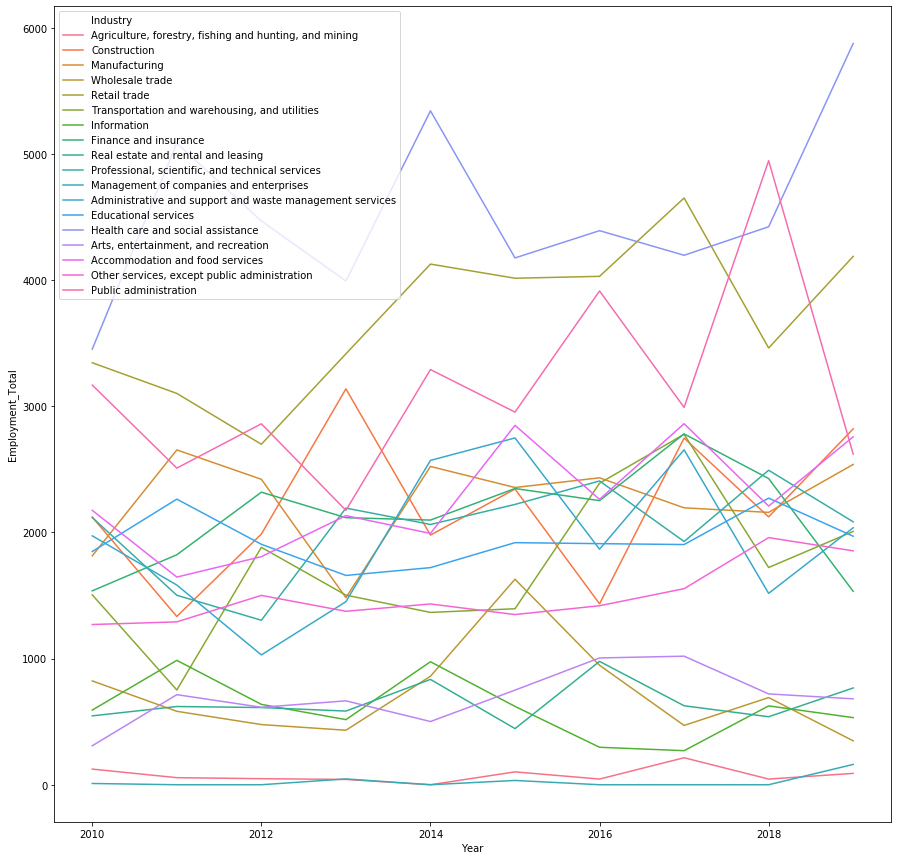

In [187]:
# visualization employment development all industries
industry = industry_RC[(industry_RC.Industry != 'Total')]

plt.figure(figsize=(15,15))
sns.lineplot(y=industry["Employment_Total"] ,x=industry.Year,hue=industry.Industry,  data=industry );

# 3) Data Analysis

### Industry development by gender

In [167]:
# df with total for employment and earnings with gender split
industry2 = industry_RC[(industry_RC.Industry == 'Total')]
industry2 = industry2[['Year','Employment_Male','Employment_Female','Median_Earnings_Male','Median_Earnings_Female']]
industry2.head()

,Year,Employment_Male,Employment_Female,Median_Earnings_Male,Median_Earnings_Female
0,2010,15286.0,13447.0,NaN,NaN
19,2011,13283.0,15221.0,NaN,NaN
38,2012,15659.0,12915.0,NaN,NaN
57,2013,13969.0,14952.0,NaN,NaN
76,2014,16401.0,17276.0,NaN,NaN


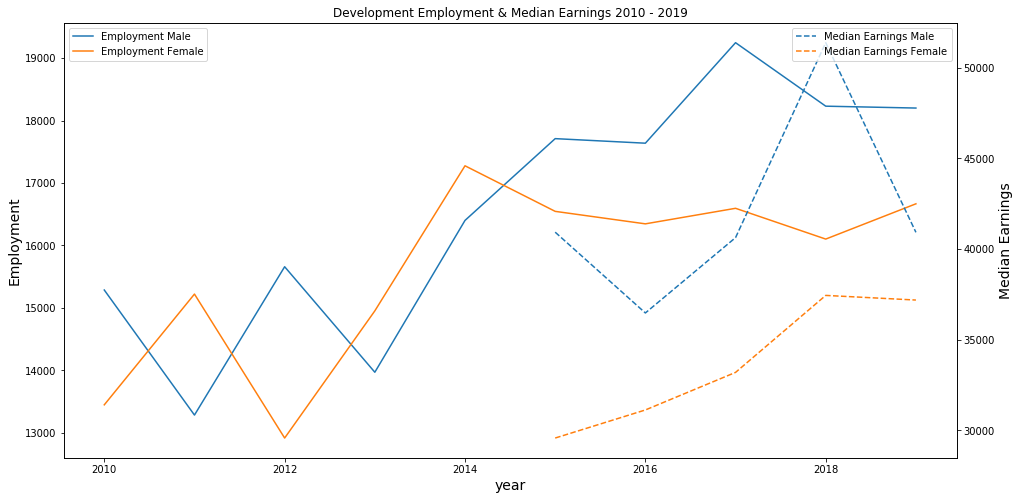

In [169]:
# visualization development 2010 - 2019
fig,ax = plt.subplots(figsize=(16, 8))

ax.plot('Year', 'Employment_Male',data=industry2, label = "Employment Male")
ax.plot('Year', 'Employment_Female',data=industry2, label = "Employment Female")
ax.set_xlabel("year",fontsize=14)
ax.set_ylabel("Employment",fontsize=14)
ax.legend(loc='upper left')

ax2=ax.twinx()
ax2.plot('Year', 'Median_Earnings_Male',data=industry2, label = "Median Earnings Male", linestyle='--')
ax2.plot('Year', 'Median_Earnings_Female',data=industry2, label = "Median Earnings Female",linestyle='--')
ax2.set_ylabel("Median Earnings",fontsize=14)
ax2.legend(loc='upper right')
ax.set_title("Development Employment & Median Earnings 2010 - 2019");
plt.show()

In [170]:
# df with employment growth rates
growth_rates = pd.DataFrame(industry_RC, columns=['Industry','Year'])
growth_rates[['Growth_rate_19']]=industry_RC.sort_values(['Year']).groupby('Industry')[['Employment_Total']].pct_change(periods=9)
growth_rates[['Growth_rate_yoy']]=industry_RC.sort_values(['Year']).groupby('Industry')[['Employment_Total']].pct_change()
growth_rates[['Growth_rate_19_abs']]=industry_RC.sort_values(['Year']).groupby('Industry')[['Employment_Total']].diff(periods=9)
growth_rates[['Growth_rate_yoY_abs']]=industry_RC.sort_values(['Year']).groupby('Industry')[['Employment_Total']].diff()
growth_rates[['Growth_rate_19_abs_female']]=industry_RC.sort_values(['Year']).groupby('Industry')[['Employment_Female']].diff(periods=9)
growth_rates[['Growth_rate_19_abs_male']]=industry_RC.sort_values(['Year']).groupby('Industry')[['Employment_Male']].diff(periods=9)
growth_rates_19 = growth_rates[growth_rates['Year'] == 2019]

In [171]:
# show values on visualization
def show_values_on_bars1(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = float(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = round(float(p.get_width()),2)
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [172]:
# show values on visualization
def show_values_on_bars2(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = 0 if (np.isnan(p.get_height())) else int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = 0 if (np.isnan(p.get_width())) else int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

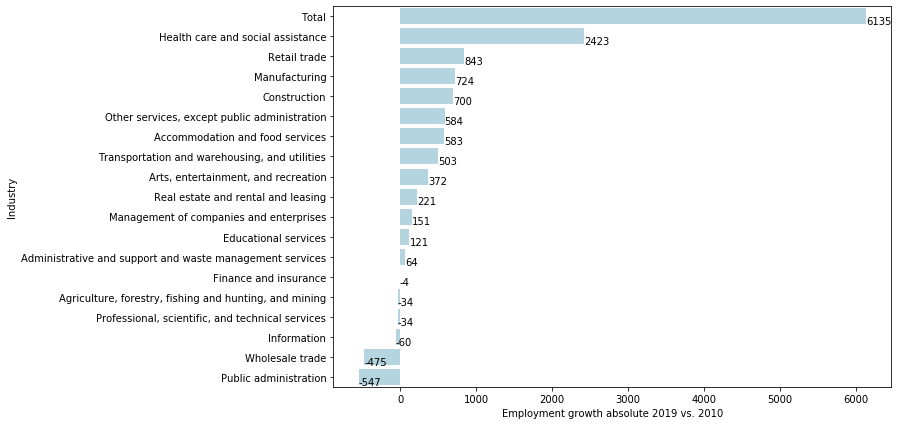

In [174]:
# visualization absolute employment growth total
growth_rates_19 = growth_rates_19.sort_values(by=['Growth_rate_19_abs'],ascending=False)
plt.figure(figsize=(10, 7))

ax = sns.barplot(y='Industry', x='Growth_rate_19_abs', data=growth_rates_19, color='lightblue')
ax.set(ylabel='Industry', xlabel="Employment growth absolute 2019 vs. 2010");
show_values_on_bars2(ax, "h", 0.2);

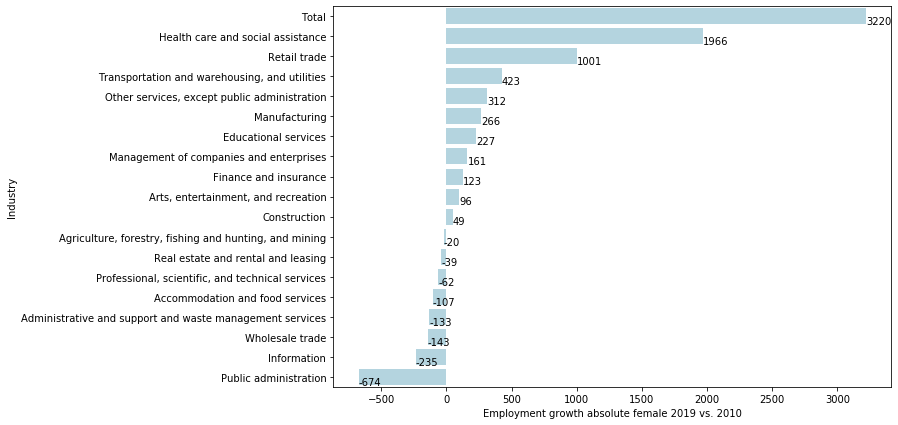

In [175]:
# visualization absolute employment growth female
growth_rates_19 = growth_rates_19.sort_values(by=['Growth_rate_19_abs_female'],ascending=False)
plt.figure(figsize=(10, 7))

ax = sns.barplot(y='Industry', x='Growth_rate_19_abs_female', data=growth_rates_19, color='lightblue')
ax.set(ylabel='Industry', xlabel="Employment growth absolute female 2019 vs. 2010")
show_values_on_bars2(ax, "h", 0.2);

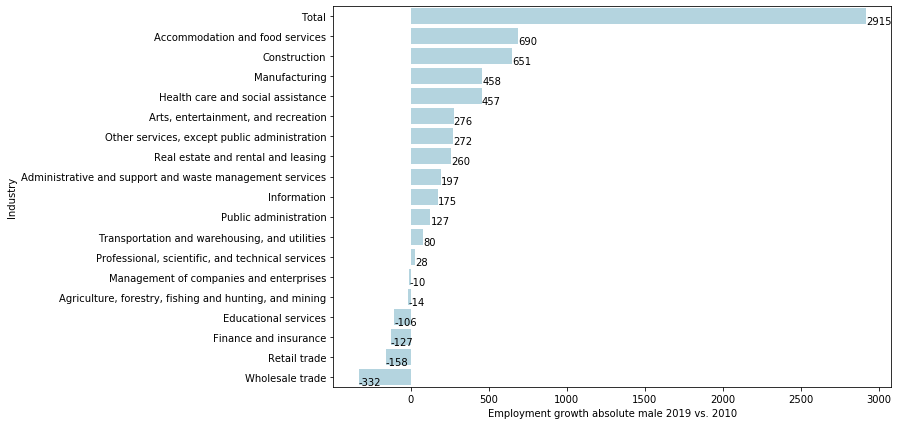

In [177]:
# visualization absolute employment growth male
growth_rates_19 = growth_rates_19.sort_values(by=['Growth_rate_19_abs_male'],ascending=False)
plt.figure(figsize=(10, 7))

ax = sns.barplot(y='Industry', x='Growth_rate_19_abs_male', data=growth_rates_19, color='lightblue')
ax.set(ylabel='Industry', xlabel="Employment growth absolute male 2019 vs. 2010")
show_values_on_bars2(ax, "h", 0.2);

In [179]:
# create df with earning growth rates
earning_rates = pd.DataFrame(industry_RC, columns=['Industry','Year'])
earning_rates[['Earning_rate_19']]=industry_RC.sort_values(['Year']).groupby('Industry')[['Median_Earnings_Total']].pct_change(periods=4)
earning_rates[['Earning_rate_19_abs']]=industry_RC.sort_values(['Year']).groupby('Industry')[['Median_Earnings_Total']].diff(periods=4)
earning_rates[['Earning_rate_male_19']]=industry_RC.sort_values(['Year']).groupby('Industry')[['Median_Earnings_Male']].pct_change(periods=4)
earning_rates[['Earning_rate_male_19_abs']]=industry_RC.sort_values(['Year']).groupby('Industry')[['Median_Earnings_Male']].diff(periods=4)
earning_rates[['Earning_rate_female_19']]=industry_RC.sort_values(['Year']).groupby('Industry')[['Median_Earnings_Female']].pct_change(periods=4)
earning_rates[['Earning_rate_female_19_abs']]=industry_RC.sort_values(['Year']).groupby('Industry')[['Median_Earnings_Female']].diff(periods=4)
earning_rates_19 = earning_rates[earning_rates['Year'] == 2019]
earning_rates_19.head()

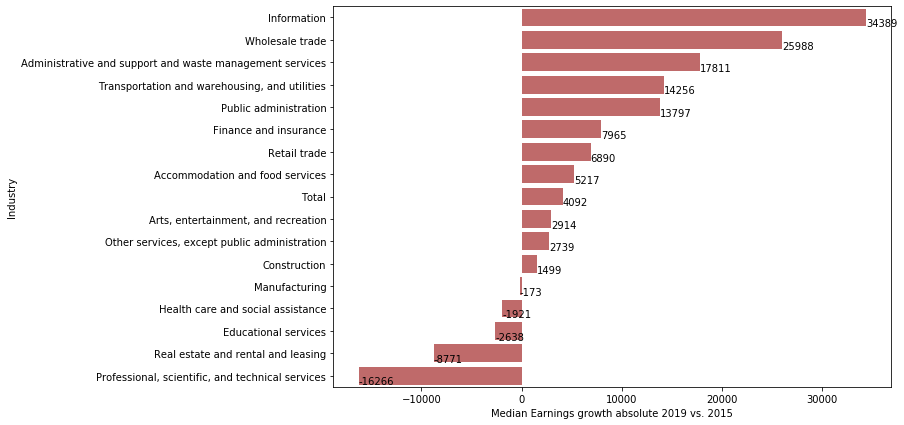

In [182]:
# visualization absolute earning growth rates total
earning_rates_19 = earning_rates_19.sort_values(by=['Earning_rate_19_abs'],ascending=False)
earning_total_19 = earning_rates_19[['Industry','Earning_rate_19_abs']]
earning_total_19 = earning_total_19.dropna()
plt.figure(figsize=(10, 7))

ax = sns.barplot(y='Industry', x='Earning_rate_19_abs', data=earning_total_19, color='indianred')
ax.set(ylabel='Industry', xlabel="Median Earnings growth absolute 2019 vs. 2015")
show_values_on_bars2(ax, "h", 0.2);

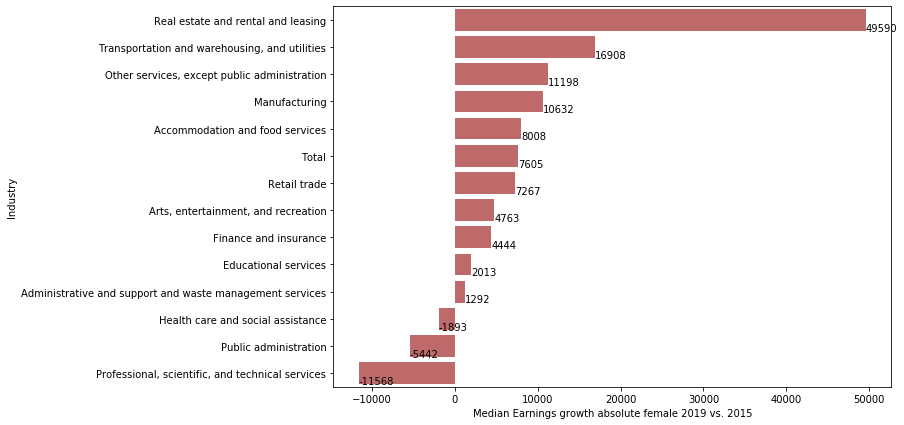

In [183]:
# visualization absolute earning growth rates female
earning_rates_19 = earning_rates_19.sort_values(by=['Earning_rate_female_19_abs'],ascending=False)
earning_female_19 = earning_rates_19[['Industry','Earning_rate_female_19_abs']]
earning_female_19 = earning_female_19.dropna()
plt.figure(figsize=(10, 7))

ax = sns.barplot(y='Industry', x='Earning_rate_female_19_abs', data=earning_female_19, color='indianred')
ax.set(ylabel='Industry', xlabel="Median Earnings growth absolute female 2019 vs. 2015")
show_values_on_bars2(ax, "h", 0.2);

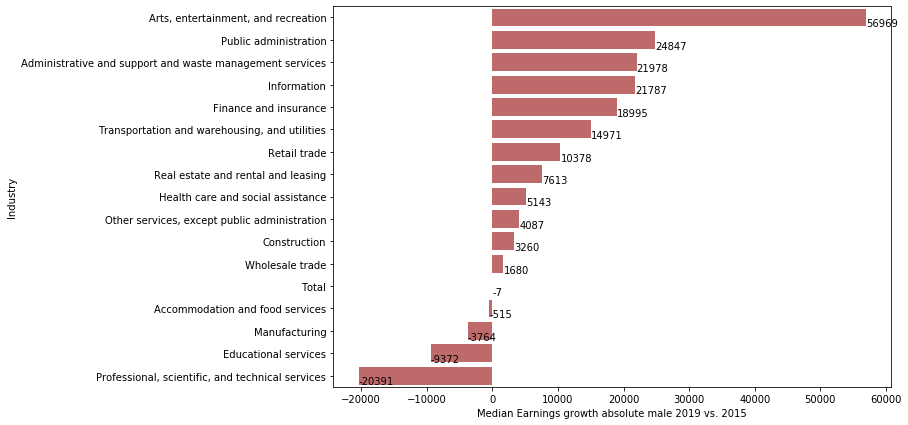

In [184]:
# visualization absolute earning growth rates male
earning_rates_19 = earning_rates_19.sort_values(by=['Earning_rate_male_19_abs'],ascending=False)
earning_male_19 = earning_rates_19[['Industry','Earning_rate_male_19_abs']]
earning_male_19 = earning_male_19.dropna()
plt.figure(figsize=(10, 7))

ax = sns.barplot(y='Industry', x='Earning_rate_male_19_abs', data=earning_male_19, color='indianred')
ax.set(ylabel='Industry', xlabel="Median Earnings growth absolute male 2019 vs. 2015")
show_values_on_bars2(ax, "h", 0.2);

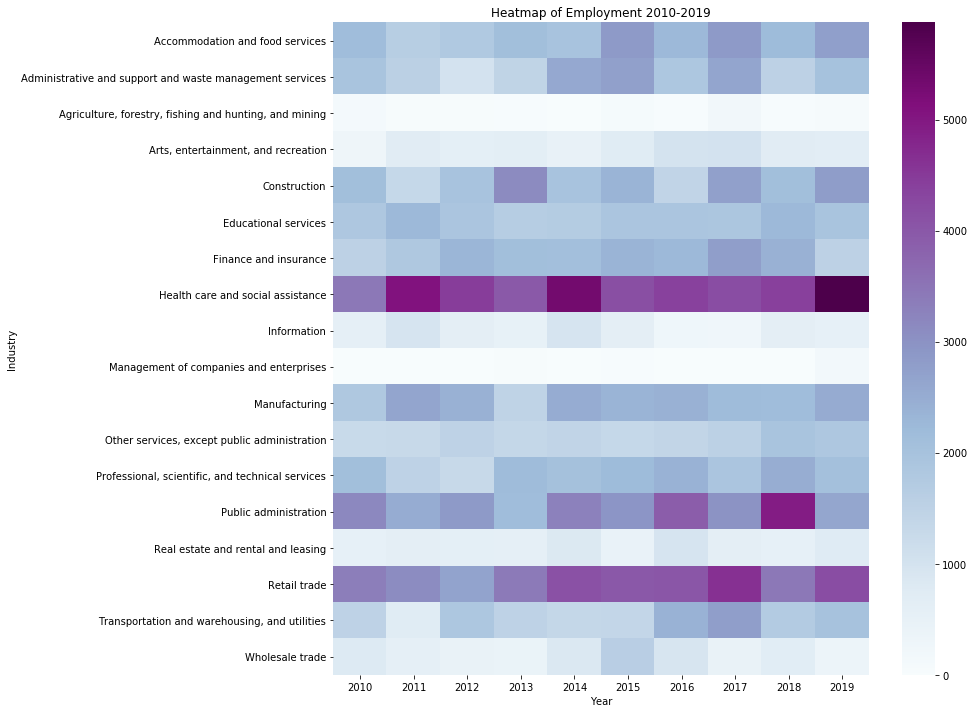

In [68]:
# employment heatmap total
employment_matrix = industry.pivot("Industry", "Year", "Employment_Total")

fig = plt.figure(figsize=(12,12))
r = sns.heatmap(employment_matrix, cmap='BuPu')
r.set_title("Heatmap of Employment 2010-2019");

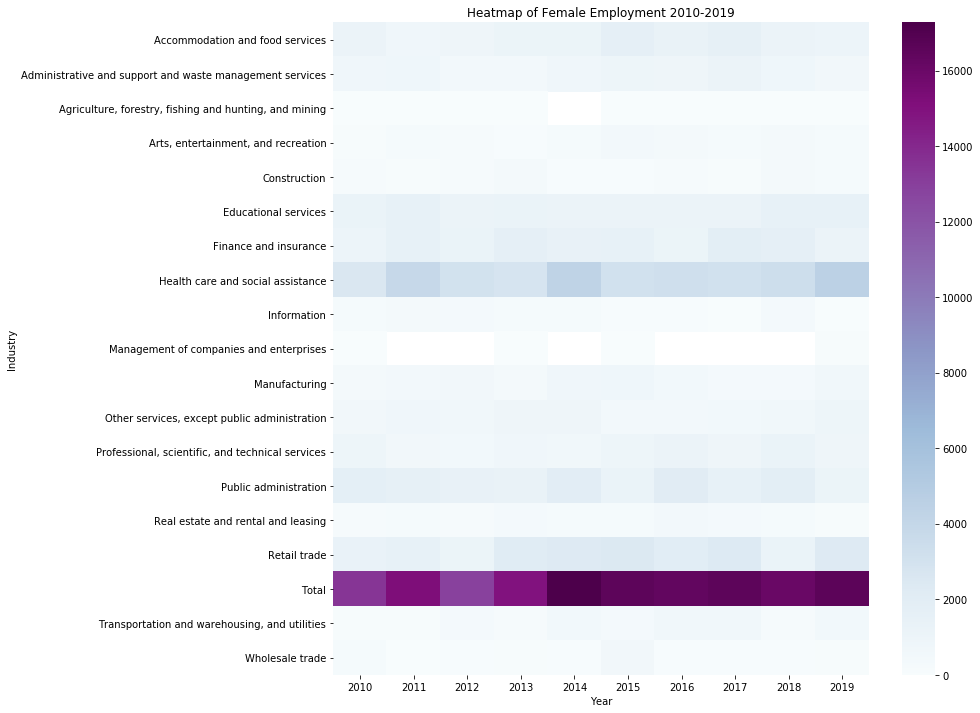

In [185]:
# employment heatmap female
employment_female_matrix = industry_RC.pivot("Industry", "Year", "Employment_Female")

fig = plt.figure(figsize=(12,12))
r = sns.heatmap(employment_female_matrix, cmap='BuPu')
r.set_title("Heatmap of Female Employment 2010-2019");

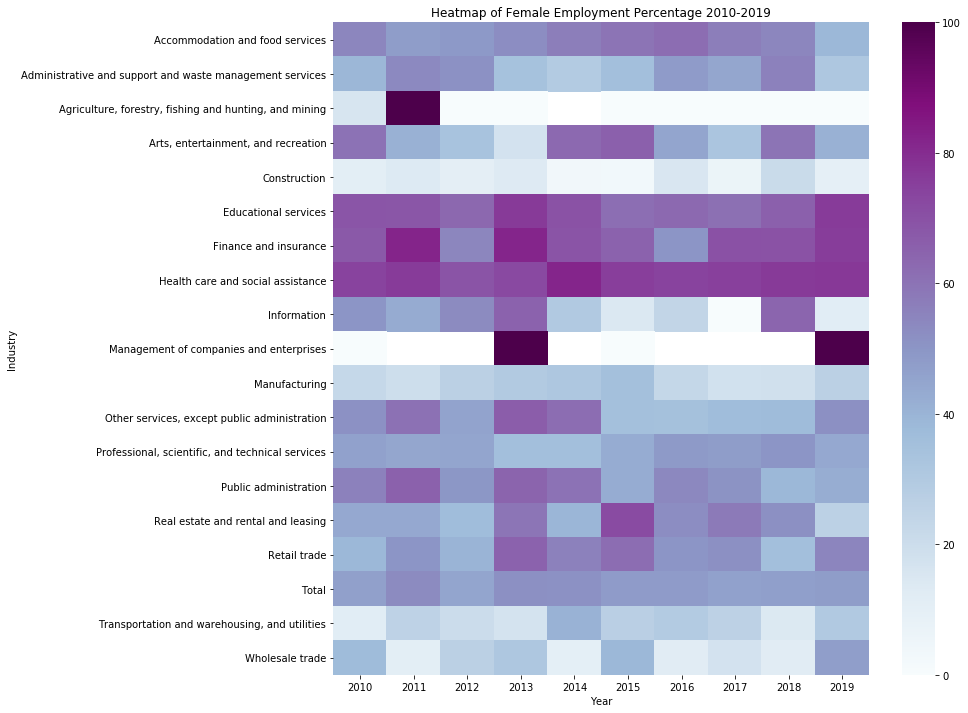

In [70]:
employment_female_per_matrix = industry_RC.pivot("Industry", "Year", "Employment_Female_Percentage")

fig = plt.figure(figsize=(12,12))
r = sns.heatmap(employment_female_per_matrix, cmap='BuPu')
r.set_title("Heatmap of Female Employment Percentage 2010-2019");

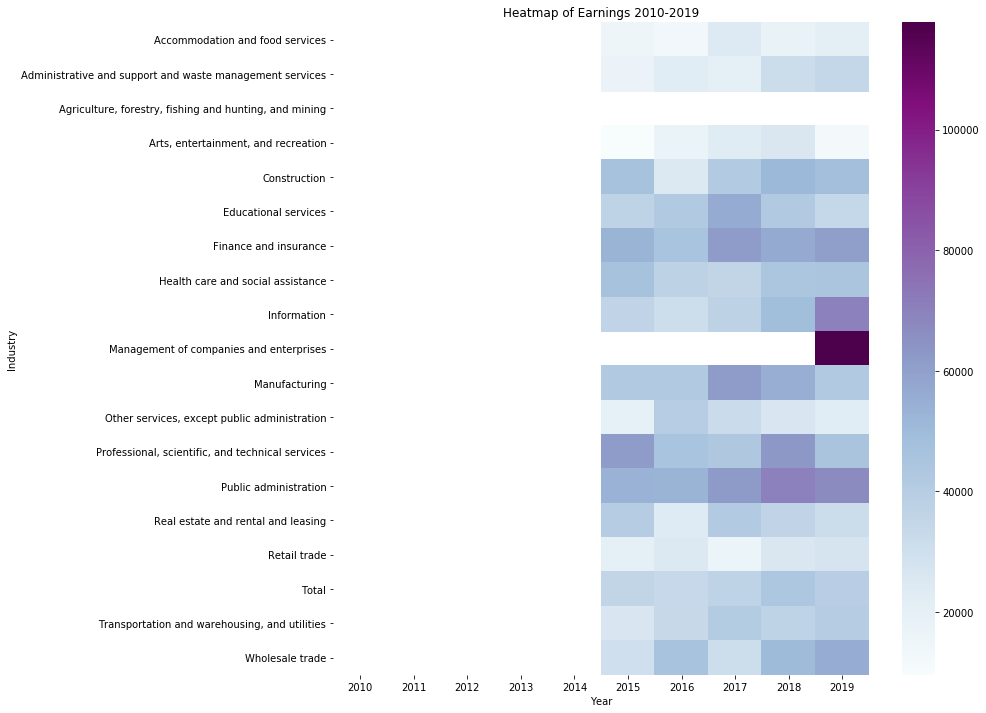

In [186]:
# earnings heatmap total
earnings_matrix = industry_RC.pivot("Industry", "Year", "Median_Earnings_Total")

fig = plt.figure(figsize=(12,12))
r = sns.heatmap(earnings_matrix, cmap='BuPu')
r.set_title("Heatmap of Earnings 2010-2019");

### Employment growth & ICT capital services growth 

Null hypothesis: There is no difference in employment growth rates between industries with high growth rates in ICT capital services versus industries with low growth rates in ICT capital services.

In [111]:
# create df with employment growth rate 2017 vs. 2010
growth_rates_17 = pd.DataFrame(industry_RC, columns=['Industry','Year','Employment_Total'])
growth_rates_17 = growth_rates_17.loc[growth_rates_17["Year"] != 2018]
growth_rates_17 = growth_rates_17.loc[growth_rates_17["Year"] != 2019]
growth_rates_17[['Growth_rate_17']]=growth_rates_17.sort_values(['Year']).groupby('Industry')[['Employment_Total']].pct_change(periods=7)
growth_rates_17 = growth_rates_17[growth_rates_17['Year'] == 2017]
growth_rates_17.dropna()
growth_rates_17.head(2)

,Industry,Year,Employment_Total,Growth_rate_17
133,Total,2017,35843,0.247451
134,"Agriculture, forestry, fishing and hunting, an...",2017,214,0.725806


In [112]:
# merge with ICT_growth df
growth_rates_17 = growth_rates_17.merge(ICT_growth, on='Industry')

In [113]:
# copy for visualization
visual = growth_rates_17

In [114]:
# drop columns not needed
growth_rates_17 = growth_rates_17[['Industry','Growth_rate_17','ICT_Group']]
growth_rates_17 = growth_rates_17.dropna()
growth_rates_17 = growth_rates_17.sort_values(by=['Growth_rate_17'],ascending=False)
growth_rates_17.head(2)

,Industry,Growth_rate_17,ICT_Group
13,"Arts, entertainment, and recreation",2.297735,High
6,"Transportation and warehousing, and utilities",0.845847,High


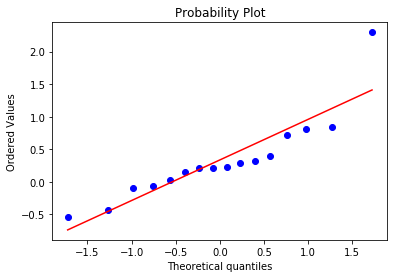

In [115]:
# check normal distribution
stats.probplot(growth_rates_17['Growth_rate_17'], dist="norm", plot=pylab)
pylab.show()

In [116]:
# two categories for ICT capital growth
High = growth_rates_17.query('ICT_Group == "High"')
Low = growth_rates_17.query('ICT_Group == "Low"')

In [117]:
# check variance
High.var()

Growth_rate_17    0.902002
dtype: float64

In [118]:
Low.var()

Growth_rate_17    0.021984
dtype: float64

In [119]:
# T-Test Welch-Test
stats.ttest_ind(growth_rates_17['Growth_rate_17'][growth_rates_17['ICT_Group'] == 'High'],
                growth_rates_17['Growth_rate_17'][growth_rates_17['ICT_Group'] == 'Low'], equal_var = False)

Ttest_indResult(statistic=1.219227236705746, pvalue=0.2669129331016484)

In [120]:
visual = visual[['Industry','Growth_rate_17','2017']]
visual['2017'] = (visual['2017']-100)/100
visual.head()

,Industry,Growth_rate_17,2017
0,Total,0.247451,0.363
1,"Agriculture, forestry, fishing and hunting, an...",0.725806,0.515
2,Construction,0.295615,0.306
3,Manufacturing,0.209366,0.123
4,Wholesale trade,-0.428919,0.422


In [121]:
# df with top 5 and bottom 5
part1 = visual.head(1)
visual = visual.sort_values(by=['Growth_rate_17'],ascending=False)
part2 = visual.head(5)
part3 = visual.tail(5)
visual = part2.append(part1)
visual = visual.append(part3)

In [122]:
visual = visual.rename(columns={"2017": "ICT growth rate", "Growth_rate_17": "Employment growth rate"})
visual = pd.melt(visual, id_vars="Industry", var_name="Type", value_name="Growth_rate")
visual.head(2)

,Industry,Type,Growth_rate
0,"Arts, entertainment, and recreation",Employment growth rate,2.297735
1,"Transportation and warehousing, and utilities",Employment growth rate,0.845847


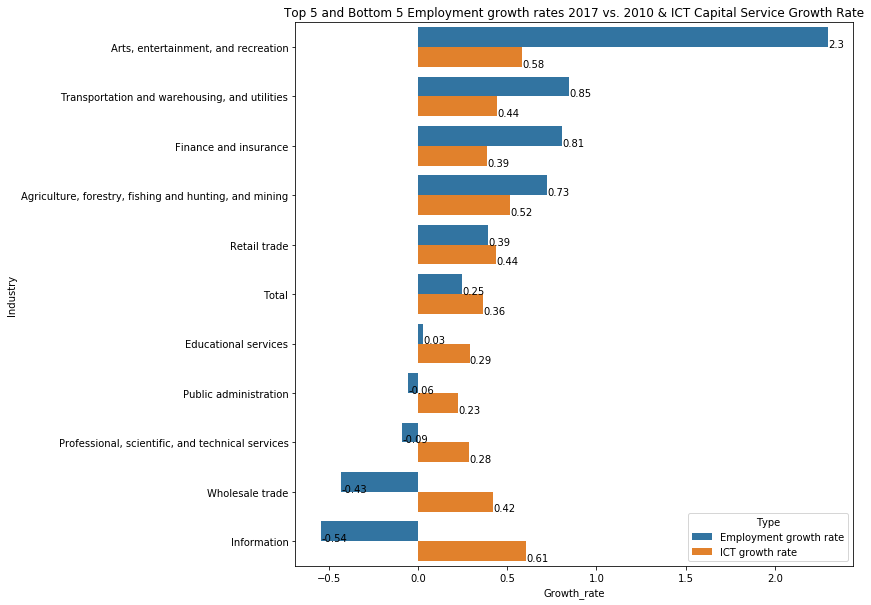

In [123]:
# visualization
plt.figure(figsize=(10, 10))

ax = sns.barplot(x="Growth_rate", y="Industry", hue="Type", data=visual, orient="h")
ax.set_title("Top 5 and Bottom 5 Employment growth rates 2017 vs. 2010 & ICT Capital Service Growth Rate");
show_values_on_bars1(ax, "h", 0.002);

Fail to reject the null hypothesis. There is no difference in employment growth rates between industries with high ICT capital growth rates and industries with low growth rates.

## Employment growth & median earnings
Null Hypothesis: Industries with high employment growth rates and industries with low employment growth rates are showing the same median earning growth rates.

In [142]:
# create df with employment growth rates from 2015- 2019
Hyp2 = pd.DataFrame(industry_RC, columns=['Industry','Year','Employment_Total'])
Hyp2 = Hyp2.loc[Hyp2["Year"] != 2010]
Hyp2 = Hyp2.loc[Hyp2["Year"] != 2011]
Hyp2 = Hyp2.loc[Hyp2["Year"] != 2012]
Hyp2 = Hyp2.loc[Hyp2["Year"] != 2013]
Hyp2 = Hyp2.loc[Hyp2["Year"] != 2014]
Hyp2[['Employment_gr']]=Hyp2.sort_values(['Year']).groupby('Industry')[['Employment_Total']].pct_change(periods=4)
Hyp2 = Hyp2[Hyp2['Year'] == 2019]
Hyp2 = Hyp2.drop(['Employment_Total', 'Year'], axis=1)
Hyp2.head(2)

,Industry,Employment_gr
171,Total,0.017836
172,"Agriculture, forestry, fishing and hunting, an...",-0.117647


In [143]:
# create df with earning rates
earning_rates = pd.DataFrame(industry_RC, columns=['Industry','Year'])
earning_rates[['Earning_rate_19']]=industry_RC.sort_values(['Year']).groupby('Industry')[['Median_Earnings_Total']].pct_change(periods=4)
earning_rates = earning_rates[earning_rates['Year'] == 2019]
earning_rates = earning_rates.dropna()
earning_rates = earning_rates.drop(['Year'], axis=1)

In [144]:
# megre employment growth rates and earnings growth rates
Hyp2 = Hyp2.merge(earning_rates, how='left', on='Industry')
Hyp2 = Hyp2.dropna()
Hyp2.head()

,Industry,Employment_gr,Earning_rate_19
0,Total,0.017836,0.115616
2,Construction,0.203498,0.032175
3,Manufacturing,0.077674,-0.004129
4,Wholesale trade,-0.786372,0.868641
5,Retail trade,0.043088,0.334905


In [145]:
# copy for visualization
visual2 = Hyp2

In [146]:
# establish two categories for employment growth rates
conditions = [
    (Hyp2['Employment_gr'] < 0.017836),
    (Hyp2['Employment_gr'] >= 0.017836)
    ]

values = ['Low', 'High']

Hyp2['Growth'] = np.select(conditions, values)
Hyp2.head(2)

,Industry,Employment_gr,Earning_rate_19,Growth
0,Total,0.017836,0.115616,Low
2,Construction,0.203498,0.032175,High


In [147]:
# drop employment growth rate
Hyp2 = Hyp2.drop(['Employment_gr'], axis=1)
Hyp2 = Hyp2[(Hyp2.Industry != 'Total')]

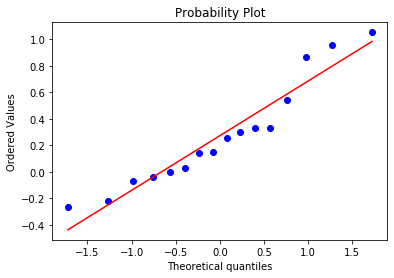

In [148]:
# check normal distribution
stats.probplot(Hyp2['Earning_rate_19'], dist="norm", plot=pylab)
pylab.show()

In [149]:
# two categories for employment growth
High = Hyp2.query('Growth == "High"')
Low = Hyp2.query('Growth == "Low"')

In [150]:
High.var()

Earning_rate_19    0.059396
dtype: float64

In [151]:
Low.var()

Earning_rate_19    0.209621
dtype: float64

In [152]:
# T-Test Welch-Test
stats.ttest_ind(Hyp2['Earning_rate_19'][Hyp2['Growth'] == 'High'],
                Hyp2['Earning_rate_19'][Hyp2['Growth'] == 'Low'], equal_var = False)

Ttest_indResult(statistic=-2.005517556849143, pvalue=0.07092935598800285)

In [153]:
visual2 = visual2.drop(['Growth'], axis=1)
visual2.head()

,Industry,Employment_gr,Earning_rate_19
0,Total,0.017836,0.115616
2,Construction,0.203498,0.032175
3,Manufacturing,0.077674,-0.004129
4,Wholesale trade,-0.786372,0.868641
5,Retail trade,0.043088,0.334905


In [154]:
# copy for correlation
corr2=visual2

In [155]:
# df with top 5 and bottom 5 industries
part1 = visual2.head(1)
visual2 = visual2.sort_values(by=['Employment_gr'],ascending=False)
part2 = visual2.head(5)
part3 = visual2.tail(5)
visual2 = part2.append(part1)
visual2 = visual2.append(part3)
visual2.head()

,Industry,Employment_gr,Earning_rate_19
9,Real estate and rental and leasing,0.723596,-0.215488
6,"Transportation and warehousing, and utilities",0.439427,0.542363
14,Health care and social assistance,0.407088,-0.041123
17,"Other services, except public administration",0.374351,0.139290
2,Construction,0.203498,0.032175


In [156]:
# transforming df for visualization
visual2 = visual2.rename(columns={"Earning_rate_19": "Median earning growth rate", "Employment_gr": "Employment growth rate"})
visual2 = pd.melt(visual2, id_vars="Industry", var_name="Type", value_name="Growth_rate")

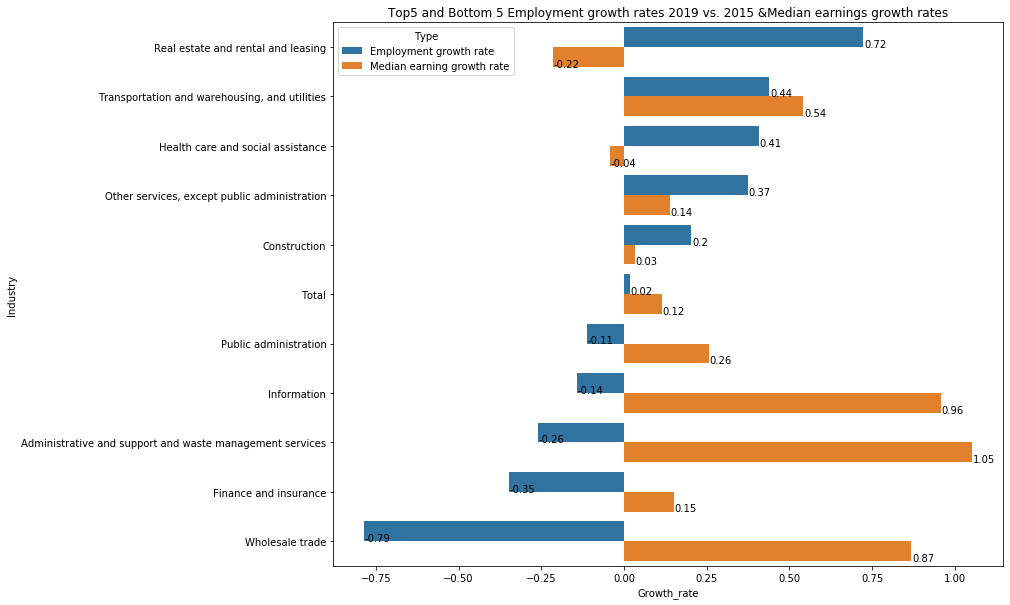

In [157]:
# visualization
plt.figure(figsize=(12, 10))

ax = sns.barplot(x="Growth_rate", y="Industry", hue="Type", data=visual2)
ax.set_title("Top5 and Bottom 5 Employment growth rates 2019 vs. 2015 &Median earnings growth rates");
show_values_on_bars1(ax, "h", 0.002);

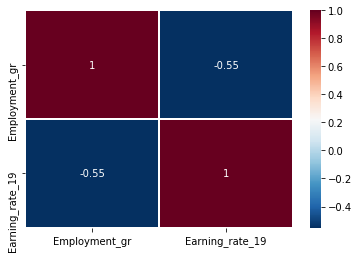

In [158]:
# check correlation - SMALL SAMPLE
corr2 = corr2[(corr2.Industry != 'Total')]

pearsoncorr = corr2.corr(method='pearson')
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5);

Null hypothesis can be rejected. There is a difference in earning growth rates between industries with high employment growth rates and industries with low employment growth rates.